# Análise de vendas

## Alucar - analisando as vendas

In [92]:
import pandas as pd

In [93]:
alucar = pd.read_csv('dados/alucar.csv')

In [94]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [95]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [96]:
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [97]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [98]:
# Converter o tipo de object para time
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [99]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [100]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

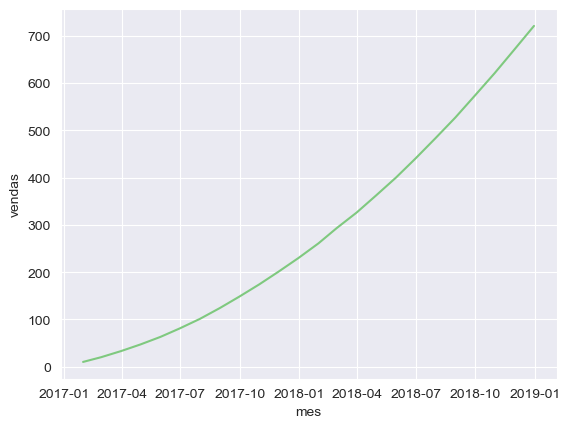

In [101]:
sns.lineplot(x='mes', y='vendas', data=alucar)

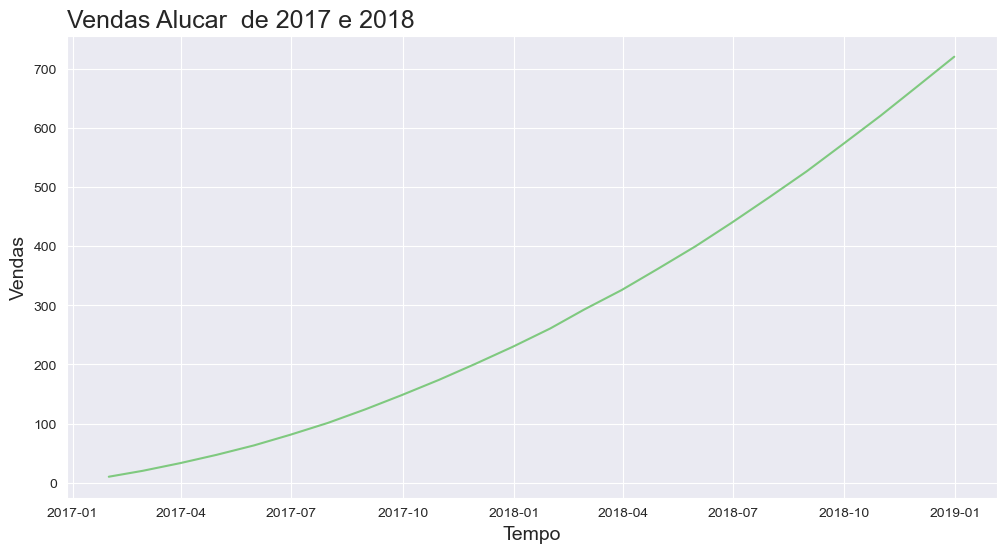

In [102]:
# Melhorar o grafico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel
ax.set_title('Vendas Alucar  de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

In [103]:
# Diferença de um mes para o outro
alucar['aumento'] = alucar['vendas'].diff()

In [104]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


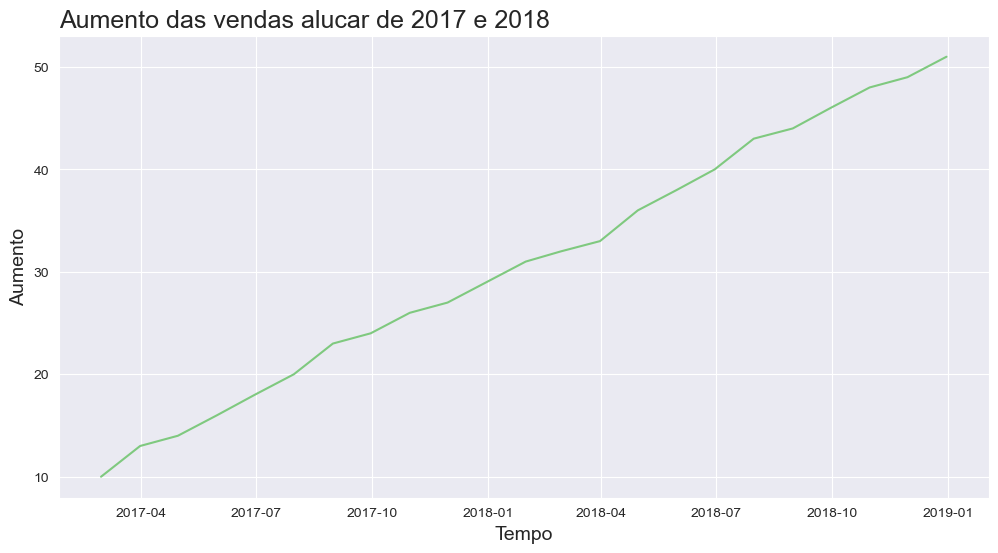

In [105]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel
ax.set_title('Aumento das vendas alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [106]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x, y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_xlabel
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

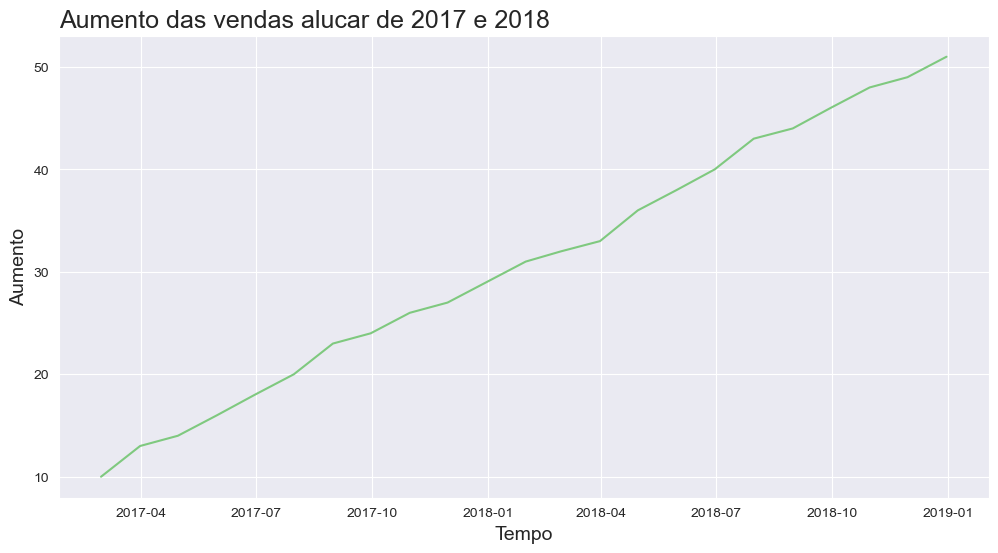

In [107]:
plotar('Aumento das vendas alucar de 2017 e 2018', 'Tempo', 'Aumento',
       'mes', 'aumento', alucar)

In [108]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [109]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


In [110]:
alucar[['aumento', 'aceleracao']] = alucar[['aumento', 'aceleracao']].fillna(0)
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,0.0,0.0
1,2017-02-28,20,10.0,0.0
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


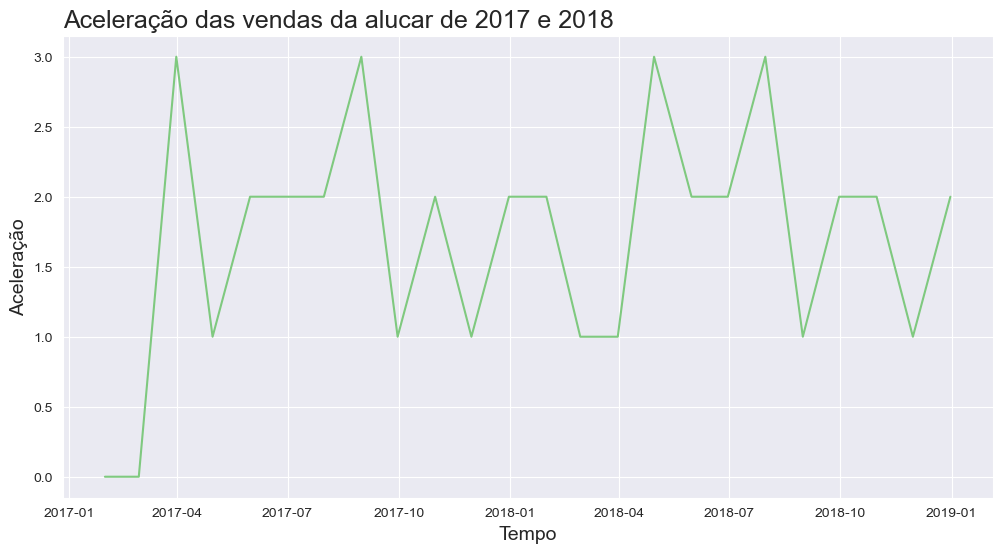

In [111]:
plotar('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo', 'Aceleração',
       'mes', 'aceleracao', alucar)

## A partir do grafico de vendas podemos obter um grafico de aumento de vendas e aceleração de vendas de acordo com o tempo

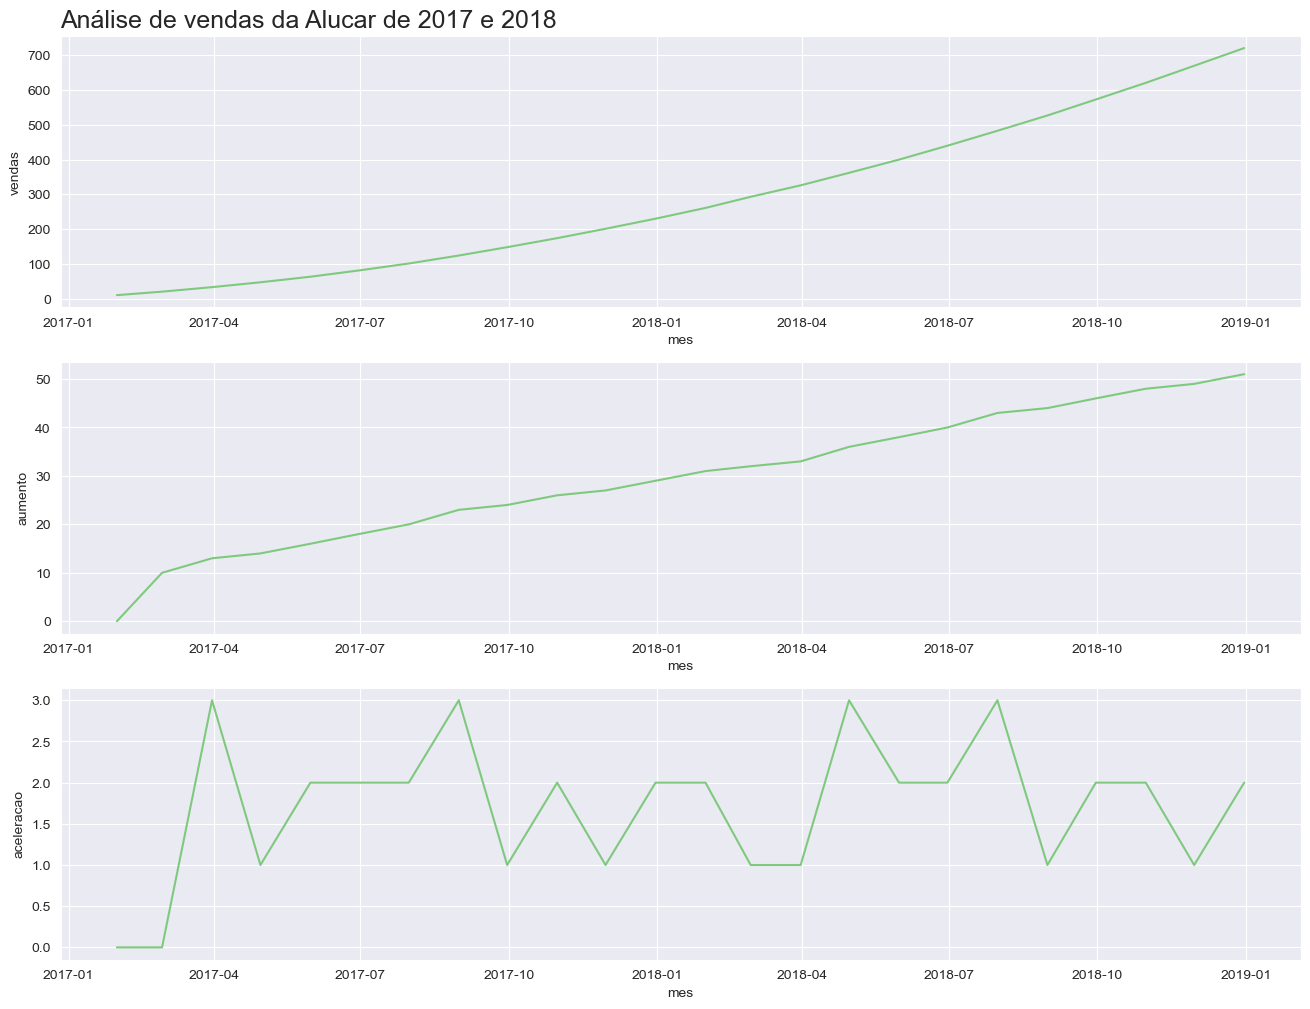

In [112]:
# Criando graficos um do lado do outro para melhor visualização
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [113]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x, y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x, y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x, y3, data=dataset)
    ax = ax

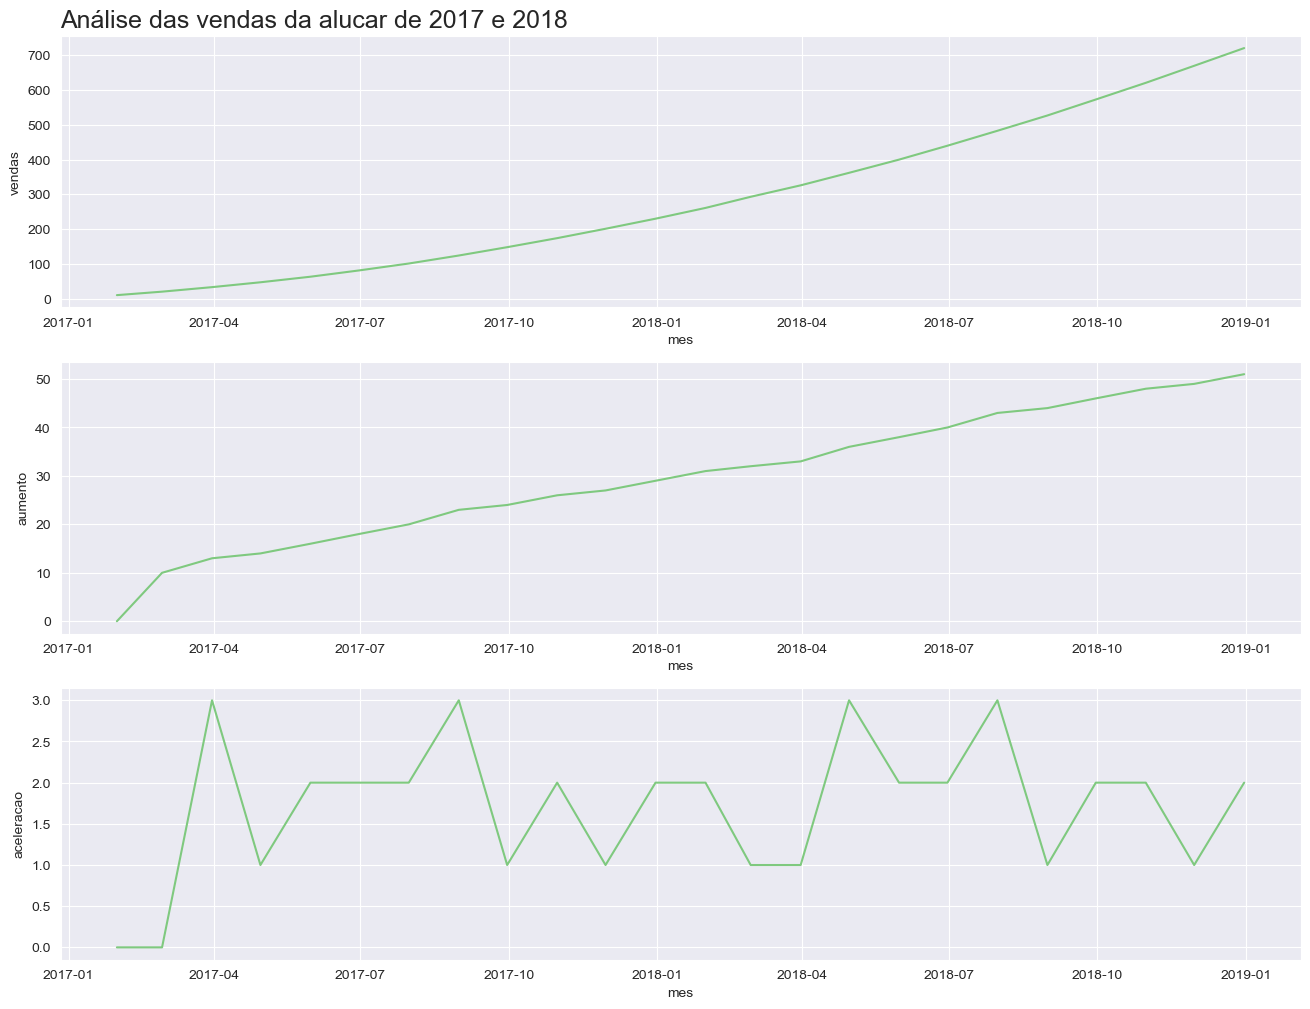

In [114]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
               alucar, 'Análise das vendas da alucar de 2017 e 2018')

## Função de autocorrelação "descobriremos se os valores obtidos pela empresa nessa semana estarão ligados aos da semana passada"

**Se tivermos um nivel de correlação 1 significa que temos uma correlação alta e se for -1 uma correlação baixa**

In [115]:
from pandas.plotting import autocorrelation_plot

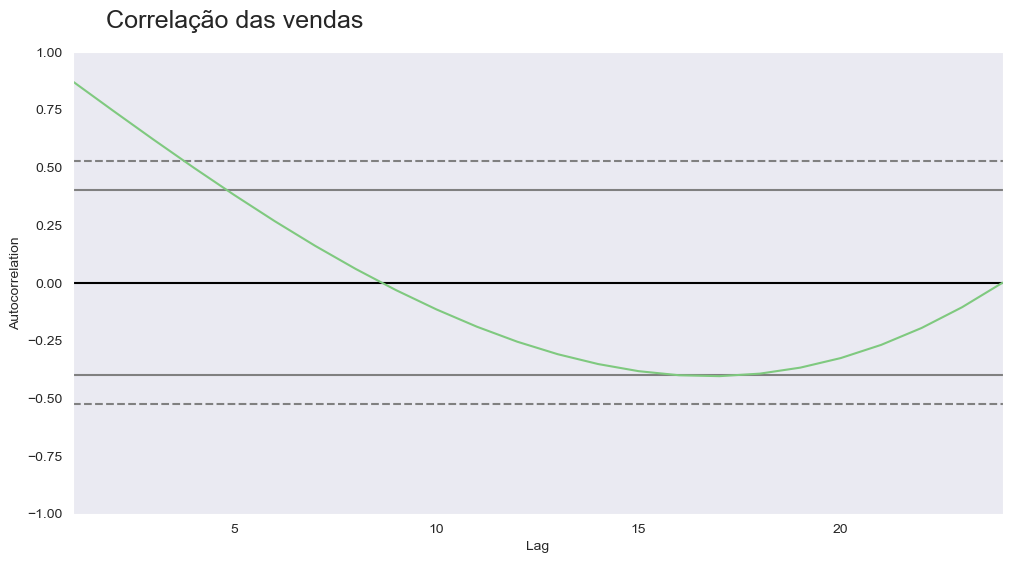

In [116]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

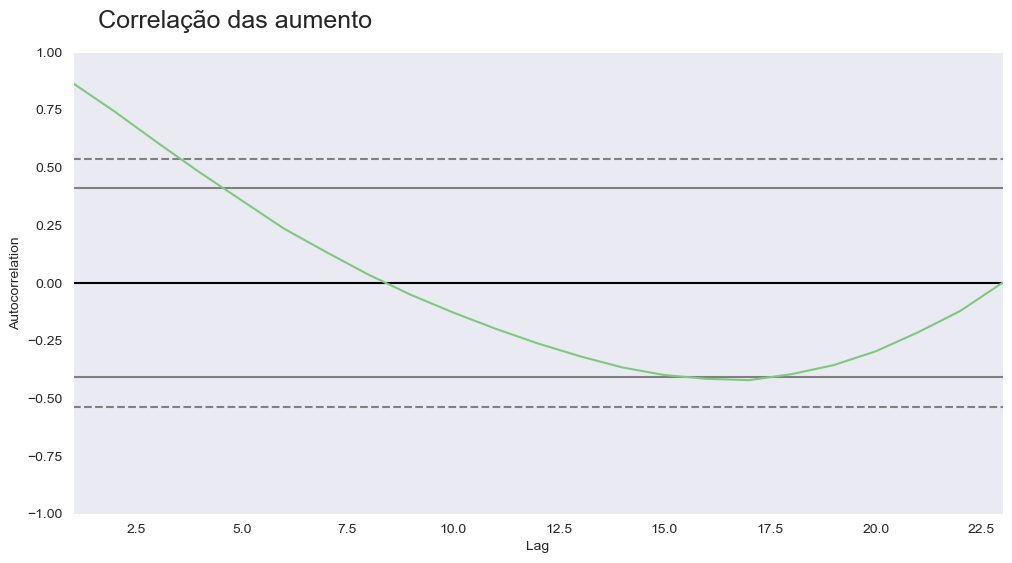

In [117]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

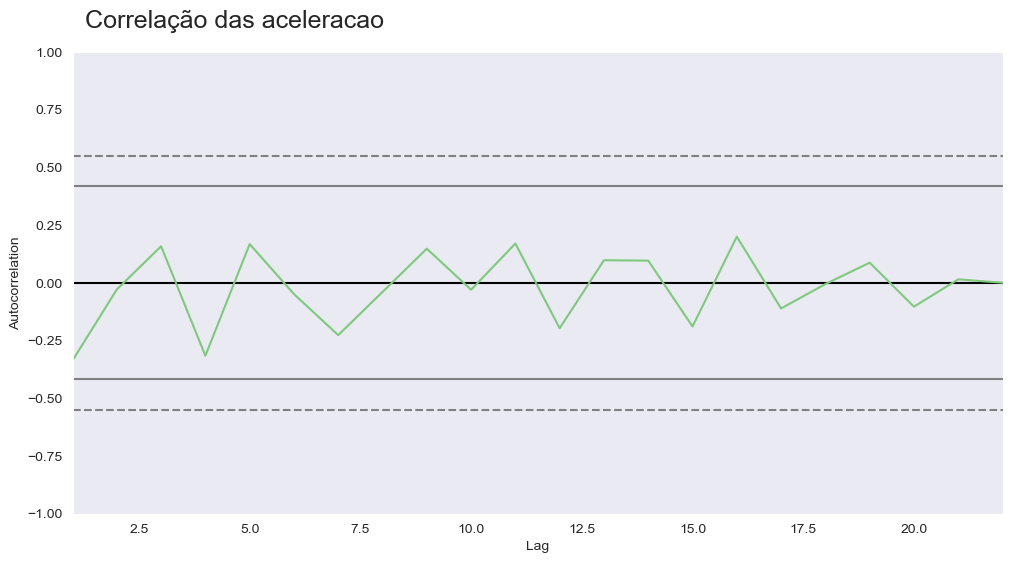

In [118]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das aceleracao', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [119]:
# Análise assinantes da Newsletter

In [120]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [121]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [122]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos:  0


In [123]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [124]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [125]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [126]:
assinantes[['aumento', 'aceleracao']] = assinantes[['aumento', 'aceleracao']].fillna(0)
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,0.0,0.0
1,2017-02-28,10,10.0,0.0
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


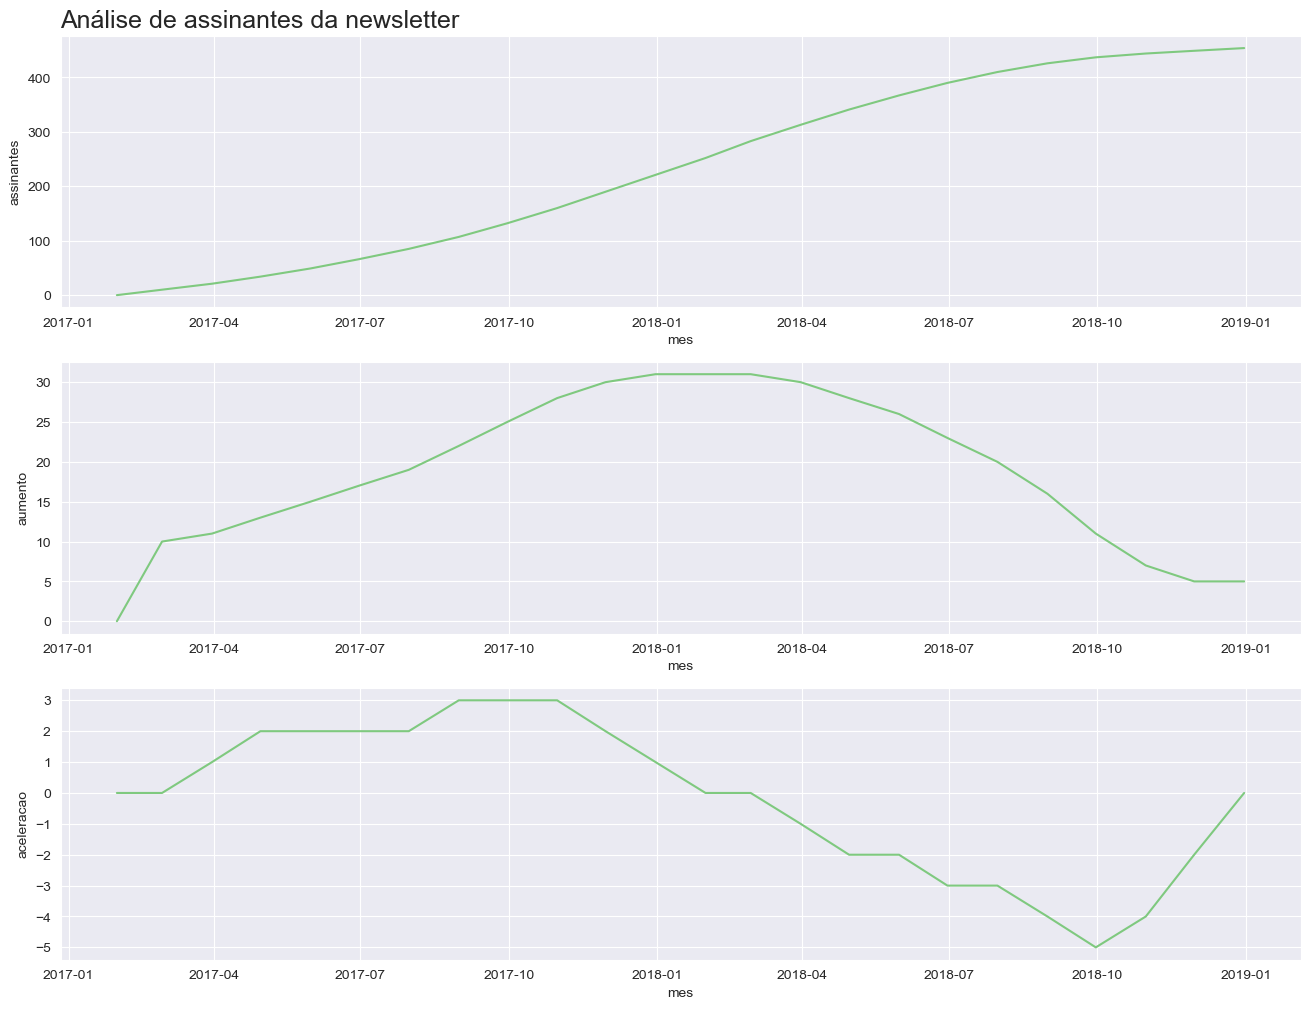

In [127]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Análise da empresa chocolura

## O problema é que em determinada época do ano ela não da conta da demanda

In [128]:
choco = pd.read_csv('dados/chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [129]:
choco.dtypes

mes       object
vendas     int64
dtype: object

In [130]:
choco['mes'] = pd.to_datetime(choco['mes'])

In [131]:
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [132]:
print('Quantidade de linhas e colunas', choco.shape)
print('Qunatidade de dados nulos: ', choco.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Qunatidade de dados nulos:  0


In [133]:
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [134]:
choco[['aumento', 'aceleracao']] = choco[['aumento', 'aceleracao']].fillna(0)
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,0.0,0.0
1,2017-02-01,185,-25.0,0.0
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


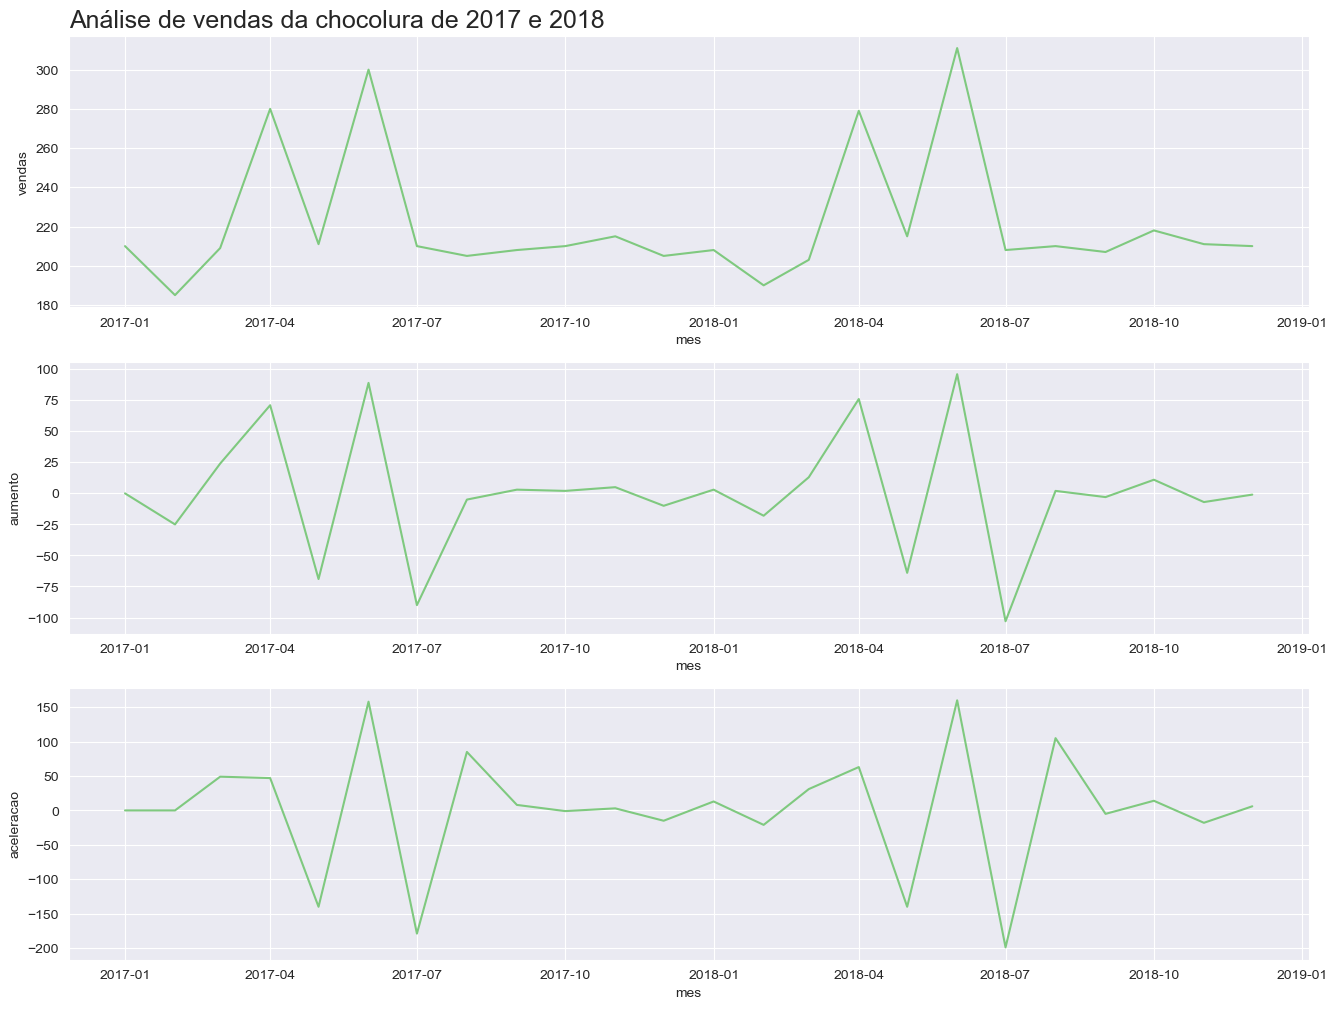

In [135]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', choco, 'Análise de vendas da chocolura de 2017 e 2018')

### Podemos observar um padrão de sazonalidade que é o aumento e a queda de determinada data que se repete 

# Chocolura análise de vendas diárias (outubro e novembro)

In [150]:
vendaschoco = pd.read_csv('dados/vendas_por_dia.csv')
vendaschoco.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [151]:
vendaschoco.dtypes

dia       object
vendas     int64
dtype: object

In [152]:
vendaschoco['dia'] = pd.to_datetime(vendaschoco['dia'])

In [153]:
vendaschoco.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [154]:
print('Quantidade de linhas e colunas', vendaschoco.shape)
print('Qunatidade de dados nulos: ', vendaschoco.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Qunatidade de dados nulos:  0


In [155]:
vendaschoco['aumento'] = vendaschoco['vendas'].diff()
vendaschoco['aceleracao'] = vendaschoco['aumento'].diff()
vendaschoco.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


In [156]:
vendaschoco[['aumento', 'aceleracao']] = vendaschoco[['aumento', 'aceleracao']].fillna(0)
vendaschoco.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,0.0,0.0
1,2018-10-02,48,-2.0,0.0
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


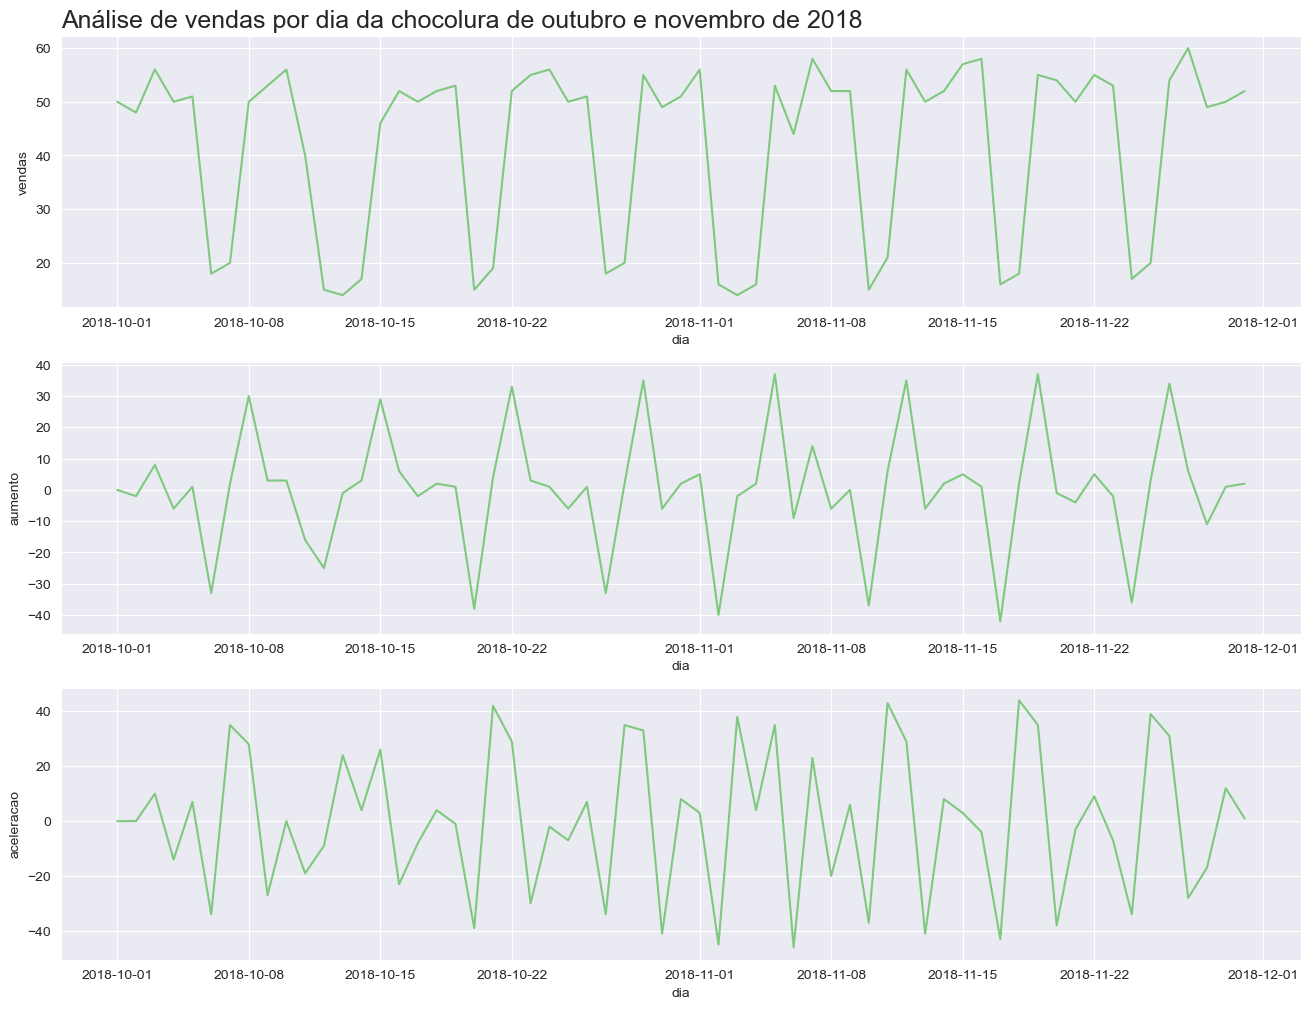

In [157]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendaschoco, 'Análise de vendas por dia da chocolura de outubro e novembro de 2018')

### Podemos observar que encontramos outra sazonalidade

# Análisando a sazonalidade

In [162]:
# Para descobrir qual é o dia da semana temos a função .dt.day_name()
vendaschoco['dia_da_semana'] = vendaschoco['dia'].dt.day_name()

In [163]:
vendaschoco.dtypes

dia              datetime64[ns]
vendas                    int64
aumento                 float64
aceleracao              float64
dia_da_semana            object
dtype: object

In [164]:
vendaschoco.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,0.0,0.0,Monday
1,2018-10-02,48,-2.0,0.0,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [165]:
vendaschoco['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [166]:
dias_traduzidos = {'Monday': 'Segunda',
                   'Tuesday': 'Terca',
                   'Wednesday': 'Quarta',
                   'Thursday': 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sabado', 
                   'Sunday': 'Domingo'}

In [167]:
vendaschoco['dia_da_semana'] = vendaschoco['dia_da_semana'].map(dias_traduzidos)

In [169]:
vendaschoco.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,0.0,0.0,Segunda
1,2018-10-02,48,-2.0,0.0,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [173]:
vendas_agrupadas = vendaschoco.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [174]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,30.0,27.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-30.0


### A queda de sazonalidade tem a tendencia de cair aos fins de semana

# Correlação das vendas diárias

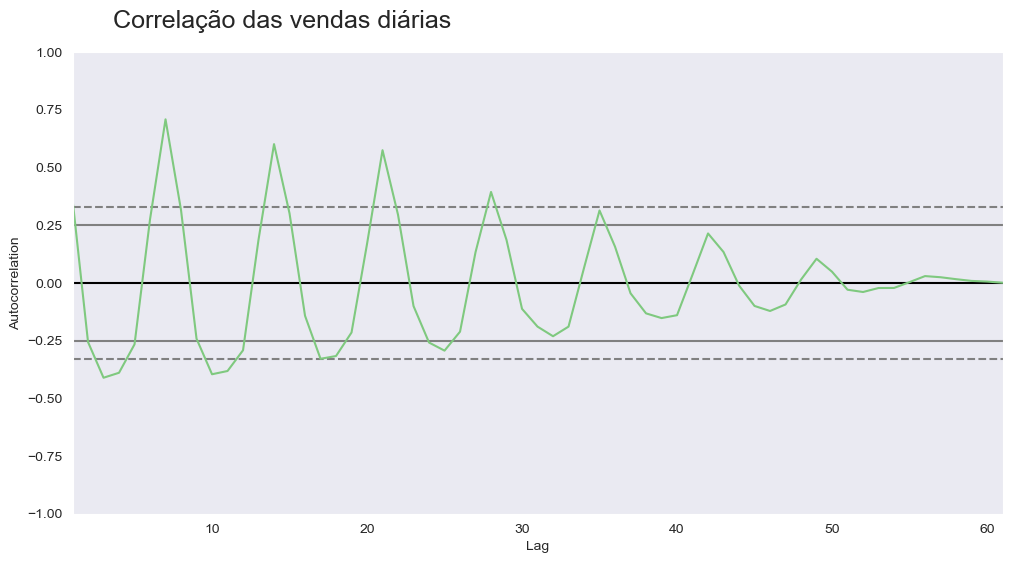

In [178]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendaschoco['vendas'])
ax = ax

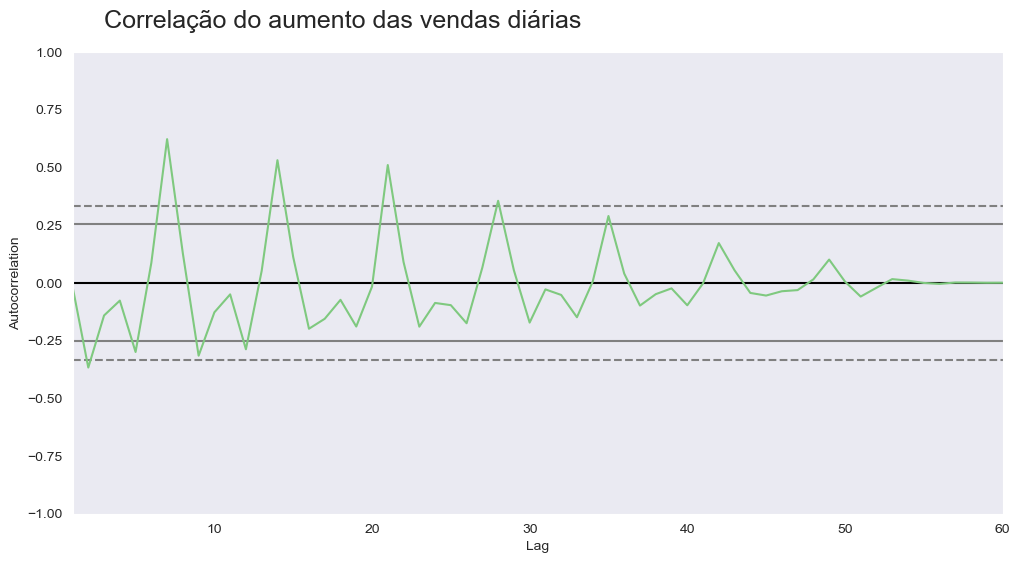

In [179]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendaschoco['aumento'][1:])
ax = ax

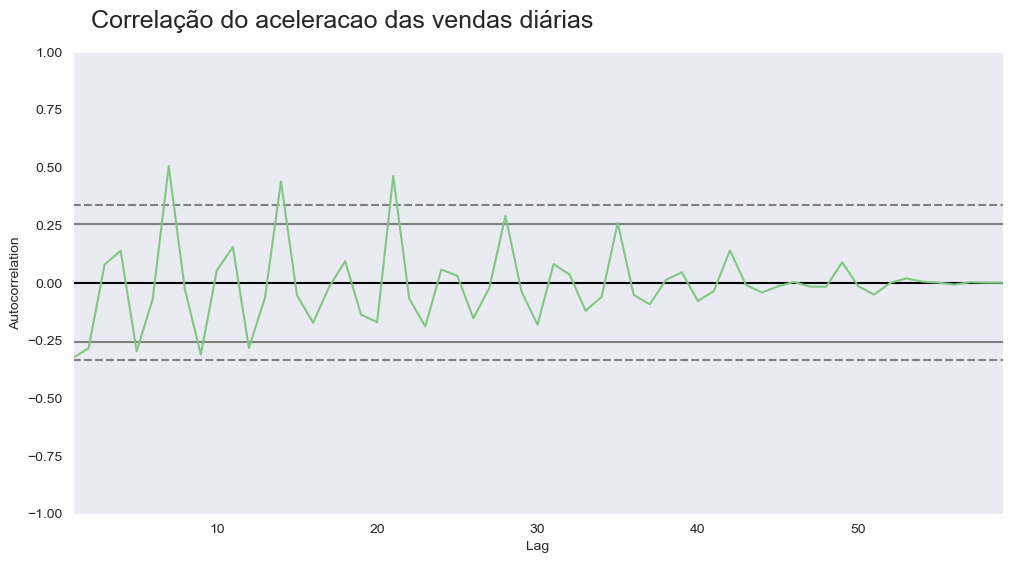

In [180]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aceleracao das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendaschoco['aceleracao'][2:])
ax = ax

# Análise da cafelura analise de vendas
**Analisar se estão vendendo bem**

In [182]:
cafelura = pd.read_csv('dados/cafelura.csv')

In [183]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [184]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [186]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [188]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [187]:
print('Quantidade de linhas e colunas', cafelura.shape)
print('Qunatidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Qunatidade de dados nulos:  0


In [189]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()
cafelura[]

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


In [190]:
cafelura[['aumento', 'aceleracao']] = cafelura[['aumento', 'aceleracao']].fillna(0)
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,0.0,0.0
1,2017-02-28,1600,720.0,0.0
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


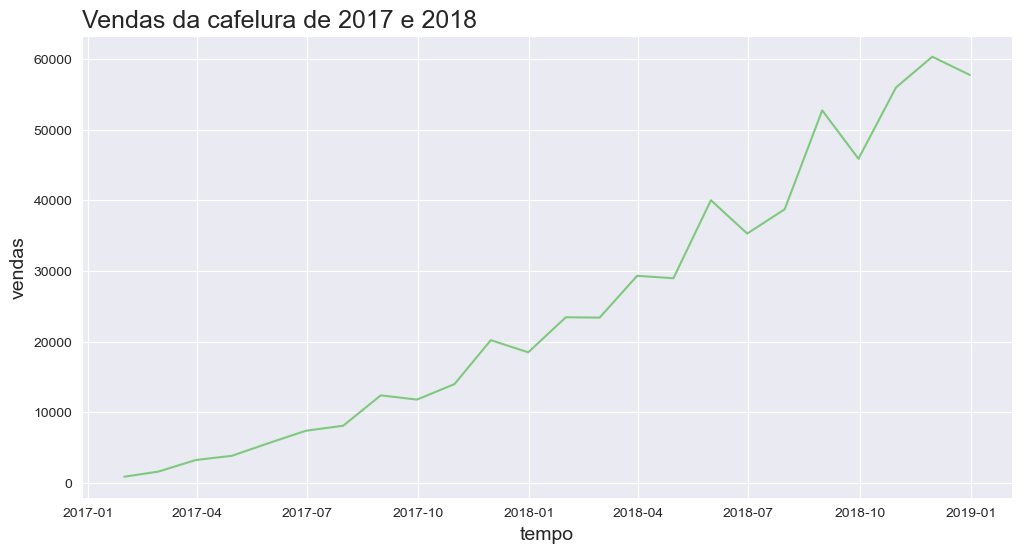

In [191]:
plotar('Vendas da cafelura de 2017 e 2018', 'tempo', 'vendas', 'mes', 'vendas', cafelura)

## Normalização

In [192]:
qtd_fds = pd.read_csv('dados/dias_final_de_semana.csv')

In [194]:
qtd_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [197]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtd_fds['quantidade_de_dias'].values

In [198]:
cafelura.head(3)

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,0.0,0.0,110.0
1,2017-02-28,1600,720.0,0.0,200.0
2,2017-03-31,3240,1640.0,920.0,324.0


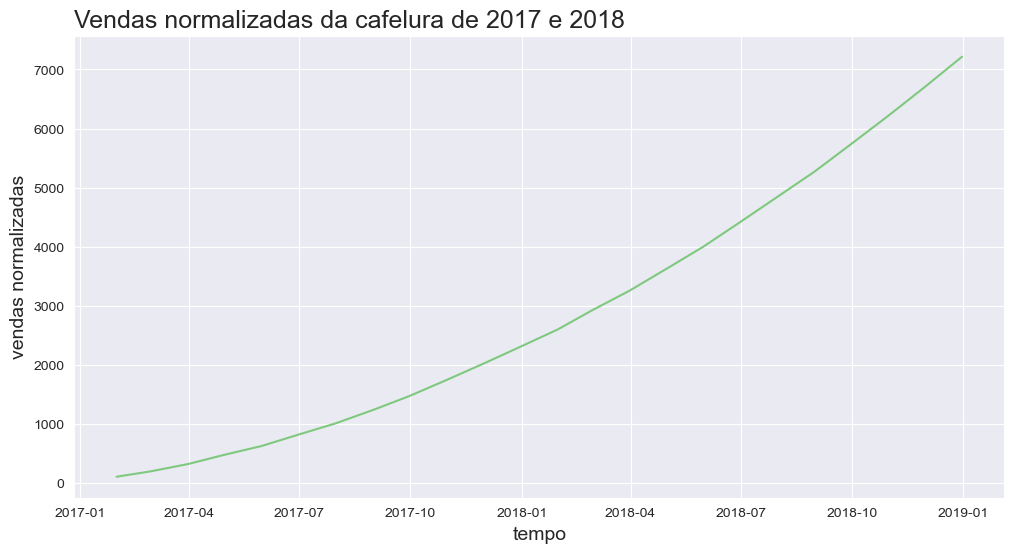

In [199]:
plotar('Vendas normalizadas da cafelura de 2017 e 2018', 'tempo', 'vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

**Após normalizar os dados com a quantidade de dias de fds temos um resultado diferente**

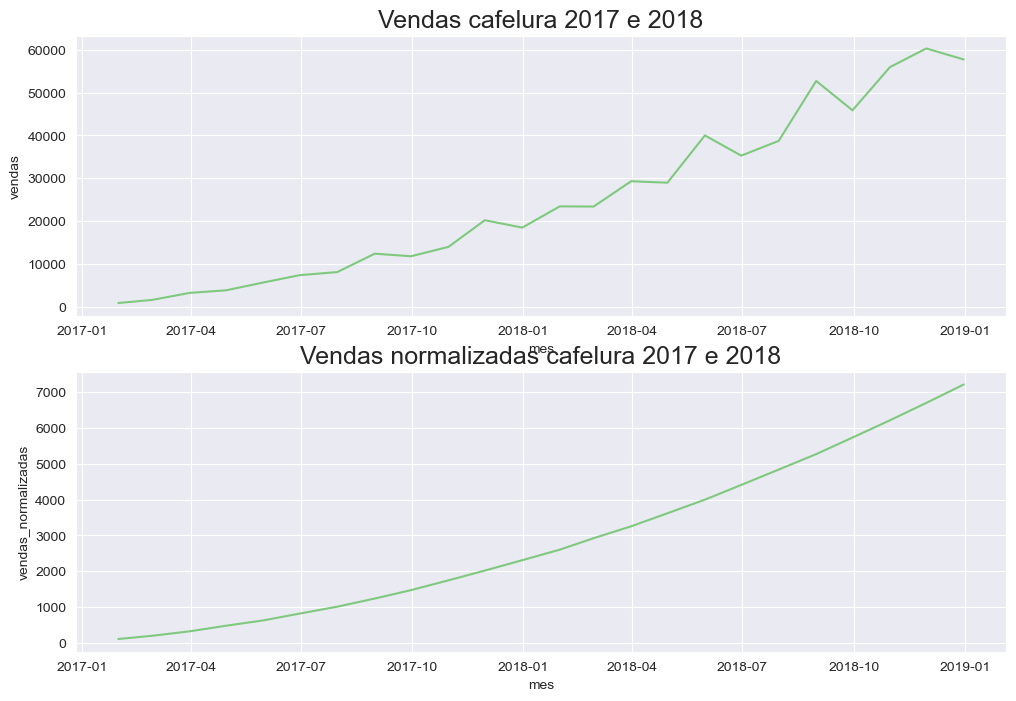

In [201]:
plt.figure(figsize=(12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Mostrar oque é tendencia, sazonalidade e ruido de uma só vez

## Statsmodels

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

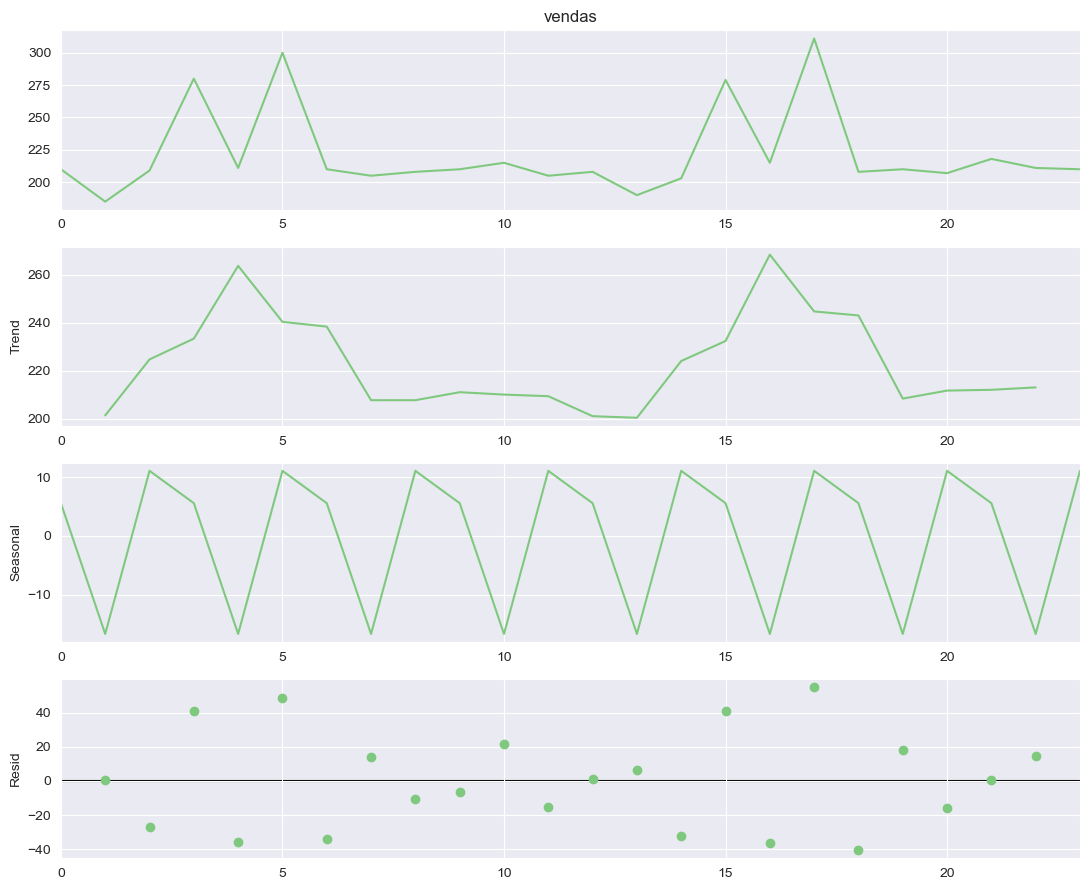

In [263]:

resultado = seasonal_decompose(choco['vendas'], period=3)
resultado.plot()
plt.show()

In [264]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [265]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()


,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


In [266]:
# resultado = resultado.fillna(0)
# resultado.head()

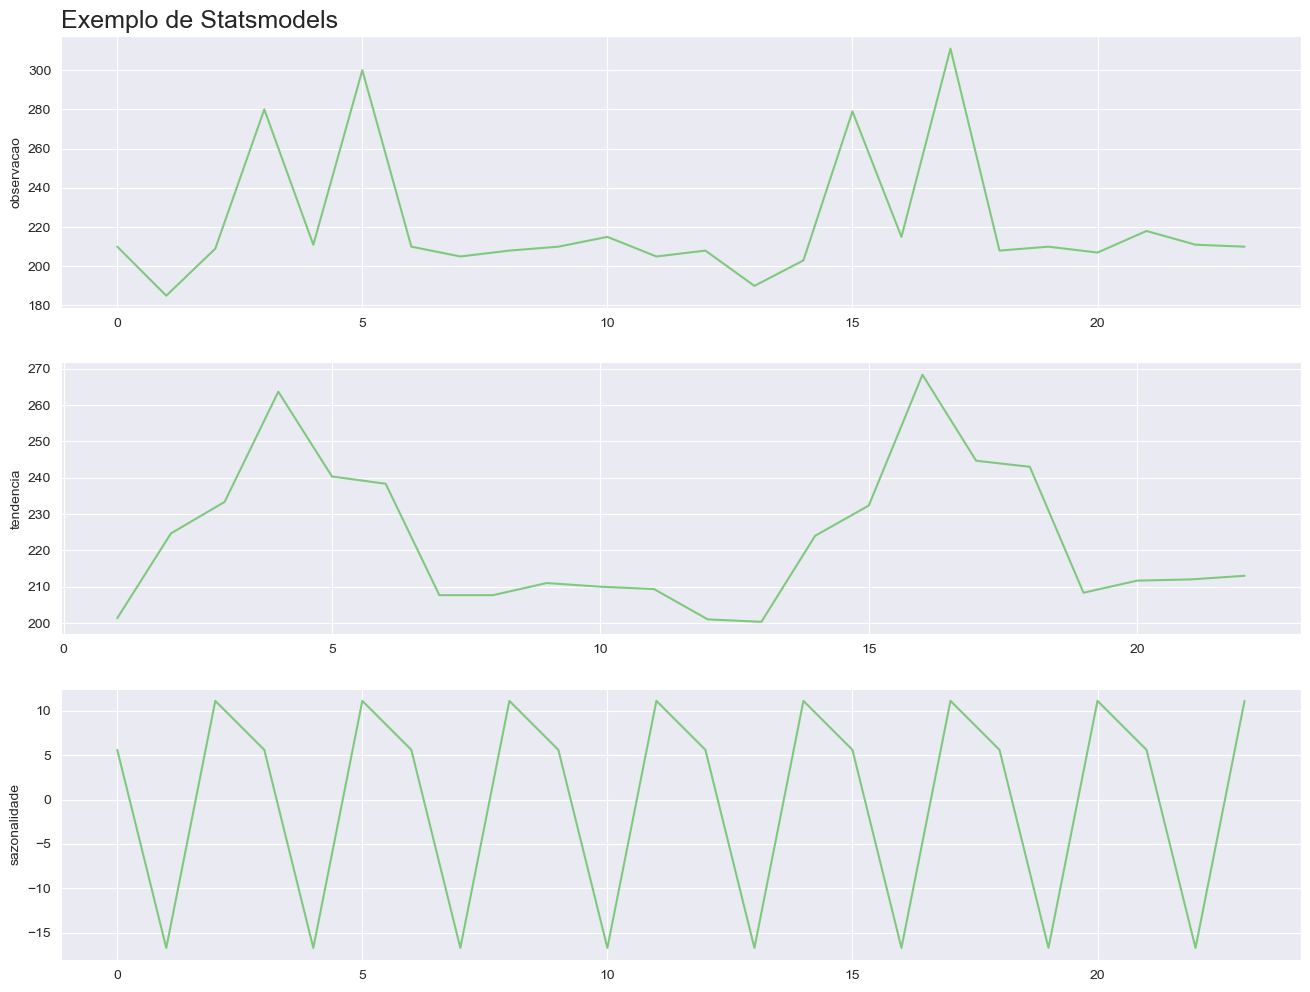

In [267]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

In [250]:
# Análise de vendas Alucel

In [251]:
alucel = pd.read_csv('dados/alucel.csv')

In [252]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [253]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [254]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [255]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [257]:
print('Quantidade de linhas e colunas', alucel.shape)
print('Qunatidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas (61, 2)
Qunatidade de dados nulos:  0


In [259]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [260]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


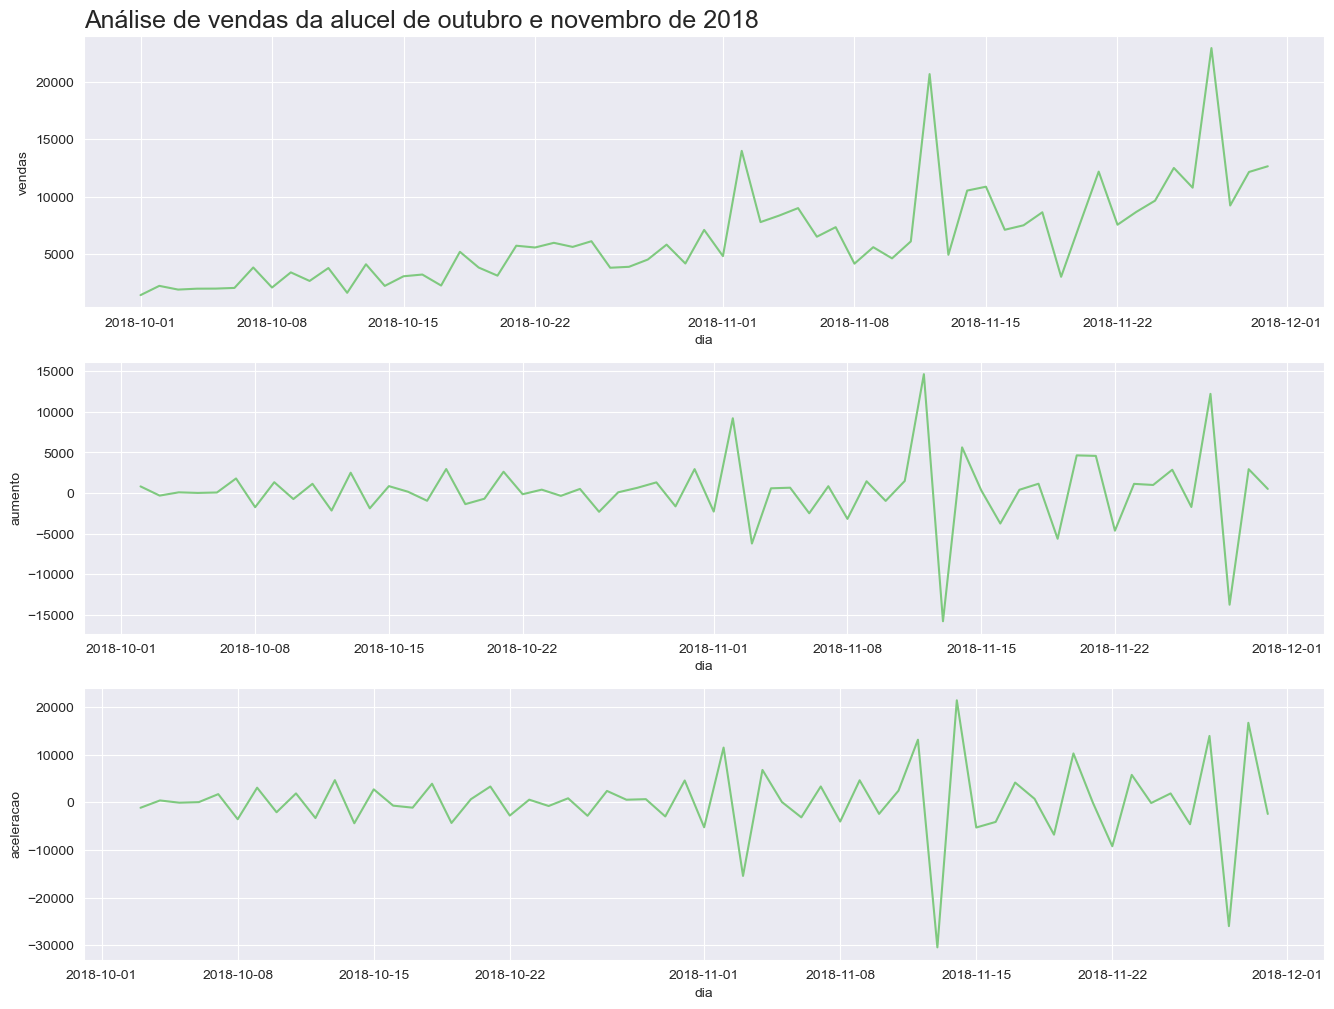

In [268]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da alucel de outubro e novembro de 2018')

**Gerou um grafico com muito ruido**

## Tecnica de média móvel para minimizar o ruido 

In [269]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [271]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


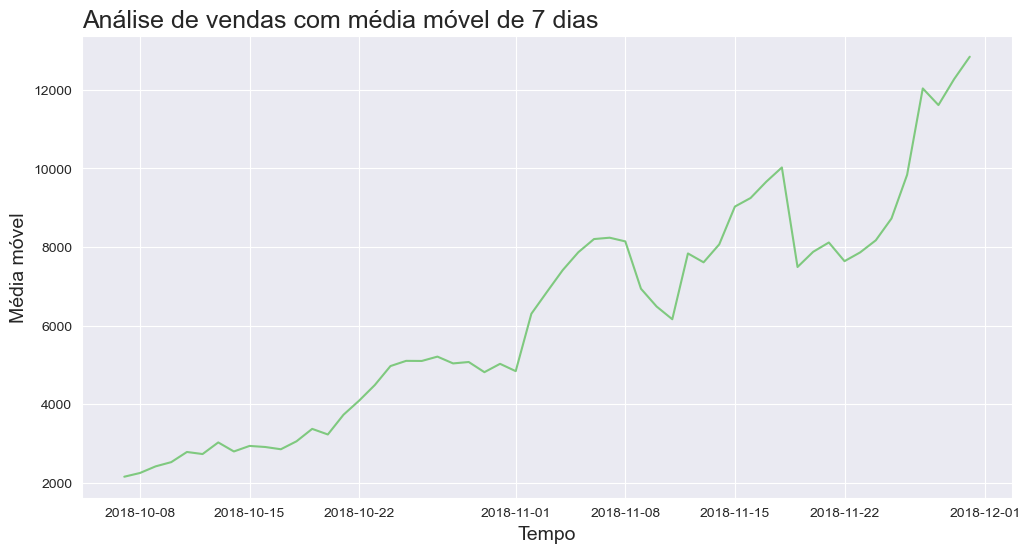

In [272]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [273]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

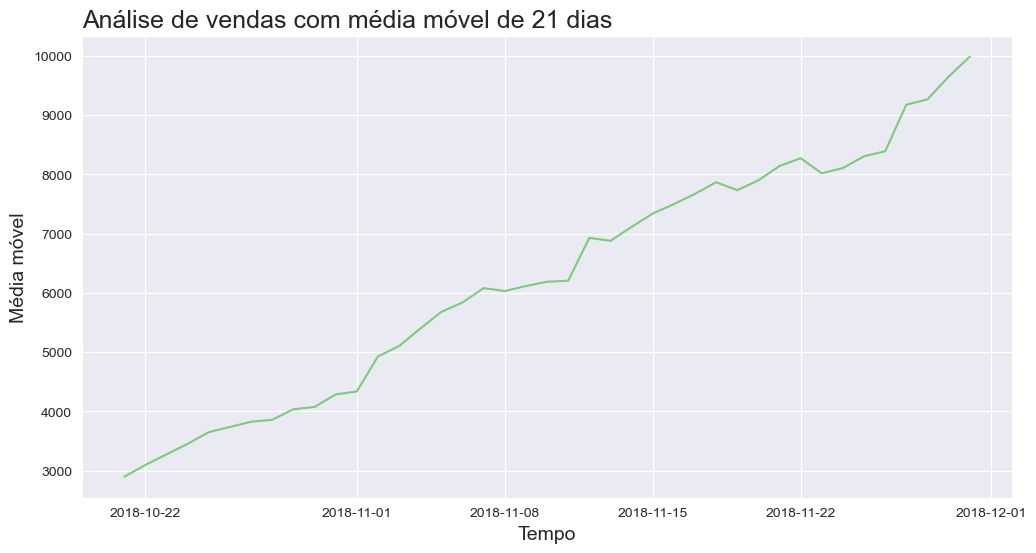

In [274]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

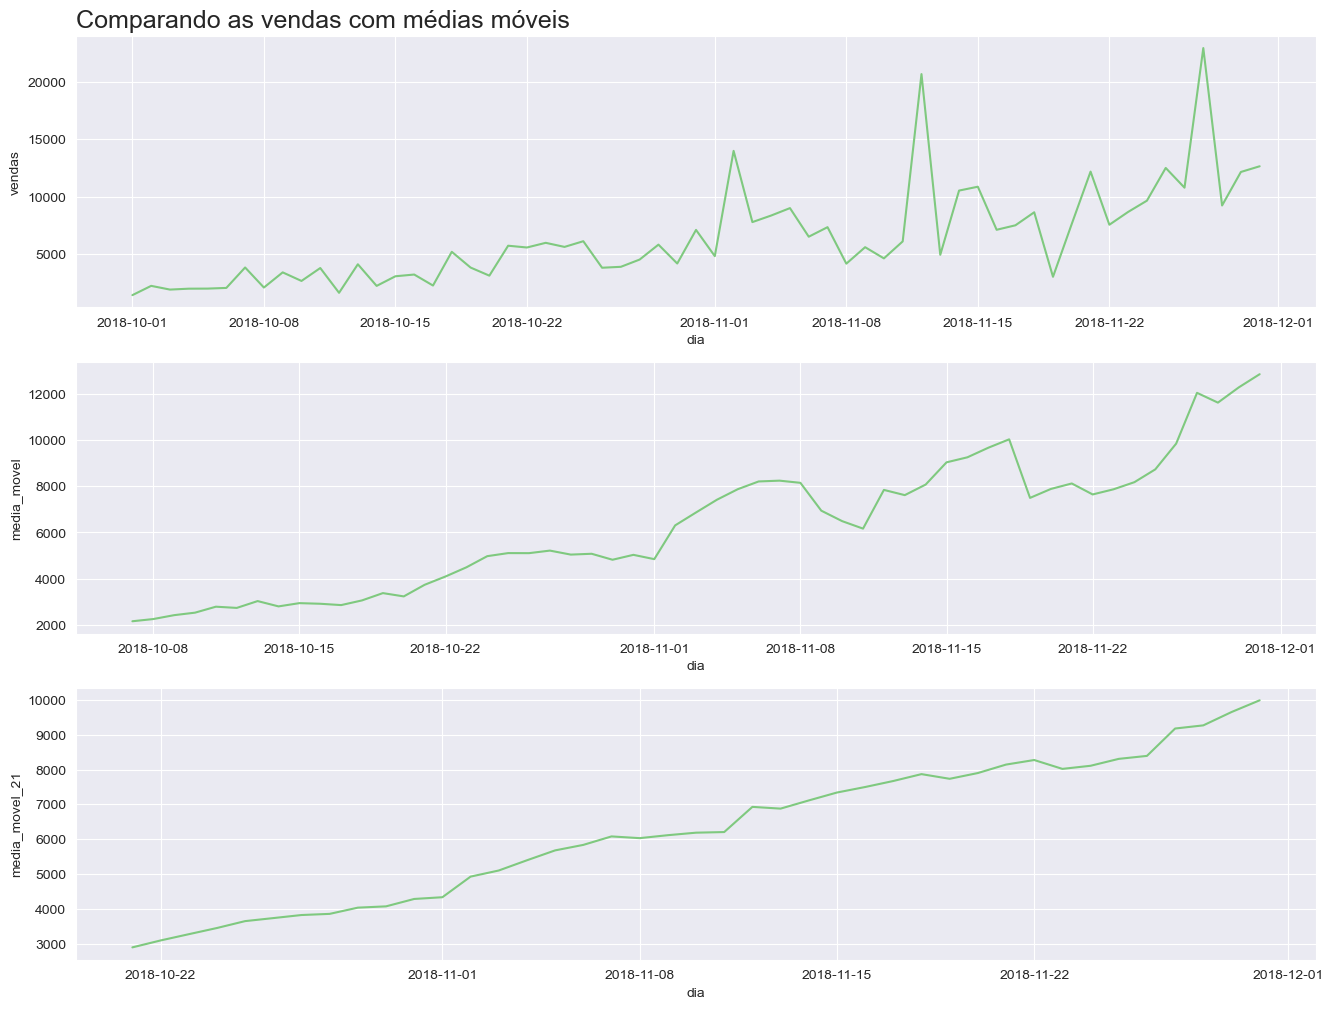

In [275]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')

**Podemos observar se fizemos um rolling muito grande podemos perder informações**